Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive/My Drive/cameraCalibrationImages/Image4.tif


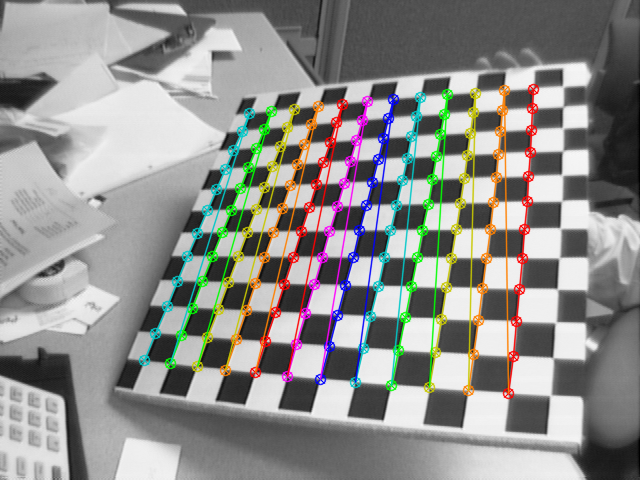

gdrive/My Drive/cameraCalibrationImages/Image7.tif


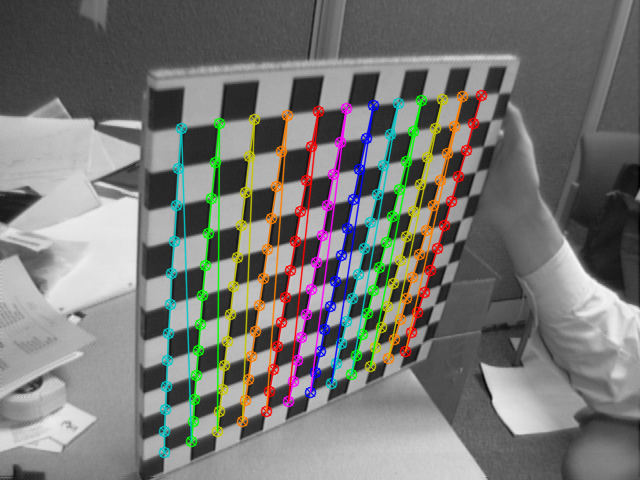

gdrive/My Drive/cameraCalibrationImages/Image6.tif


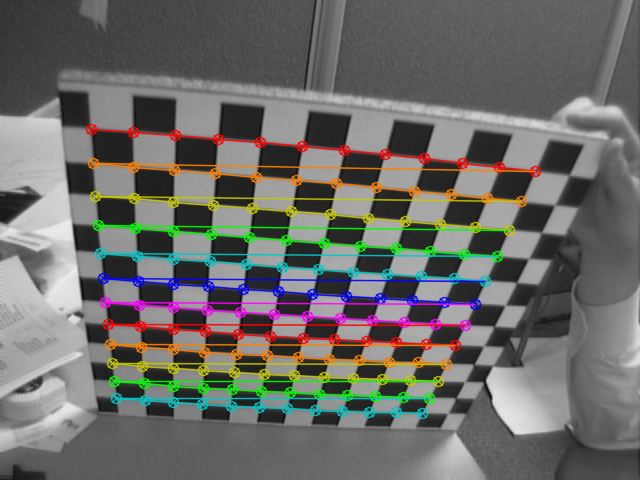

gdrive/My Drive/cameraCalibrationImages/Image2.tif


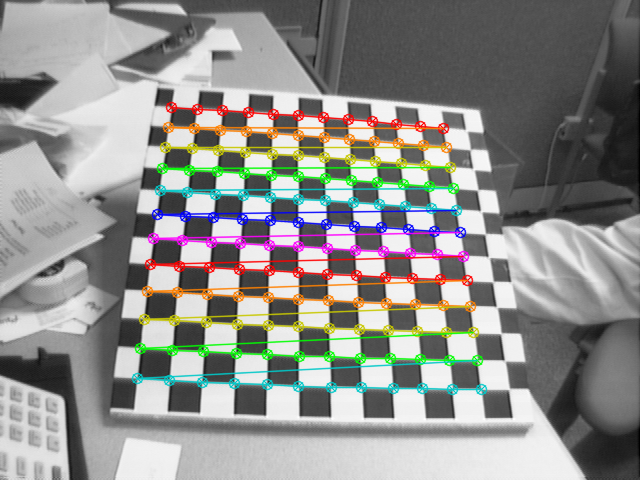

gdrive/My Drive/cameraCalibrationImages/Image3.tif


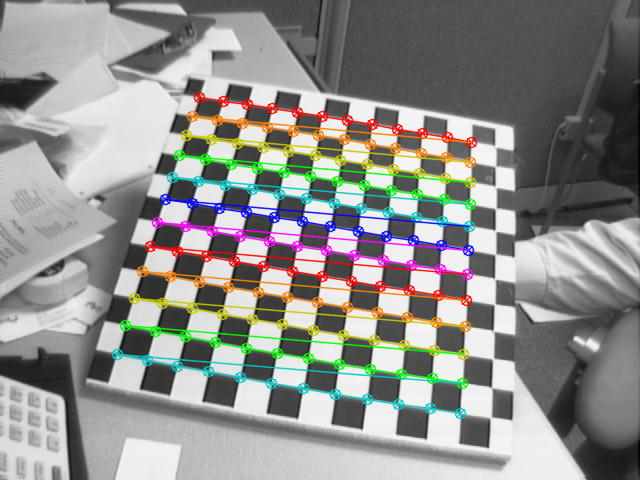

gdrive/My Drive/cameraCalibrationImages/Image16.tif


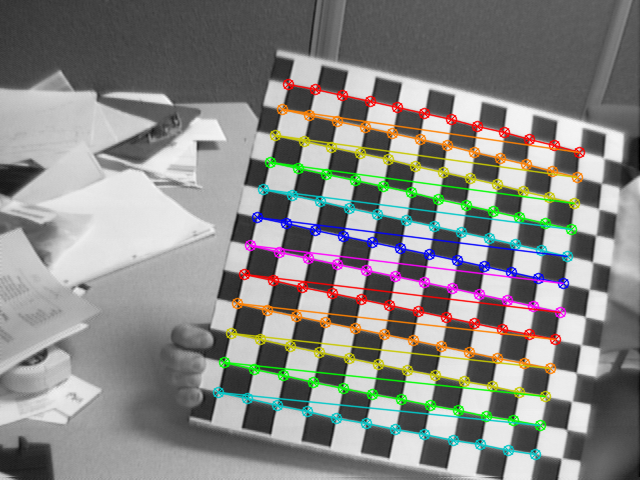

gdrive/My Drive/cameraCalibrationImages/Image11.tif


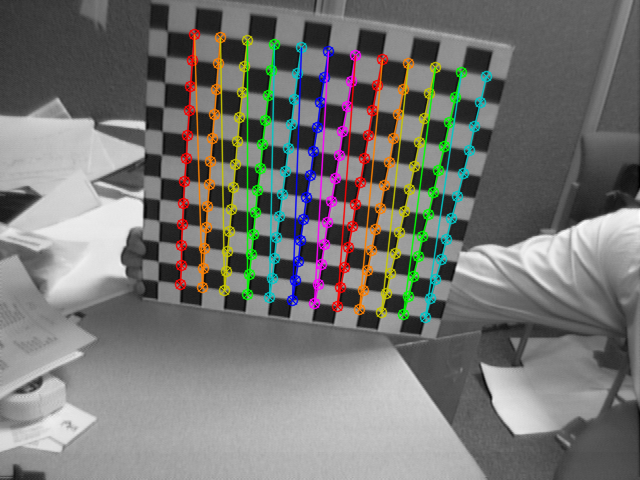

gdrive/My Drive/cameraCalibrationImages/Image14.tif


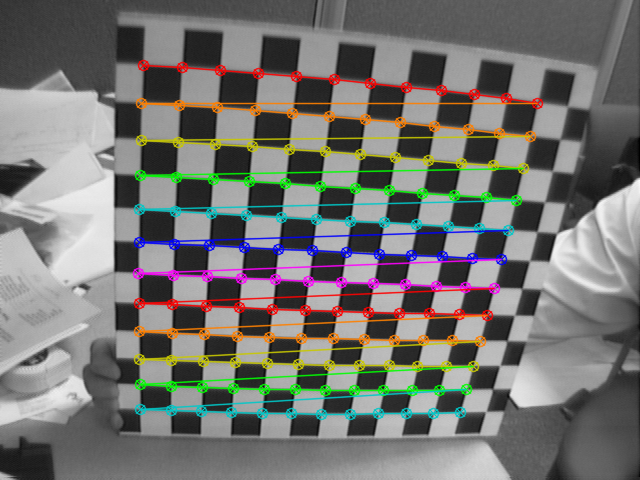

gdrive/My Drive/cameraCalibrationImages/Image15.tif


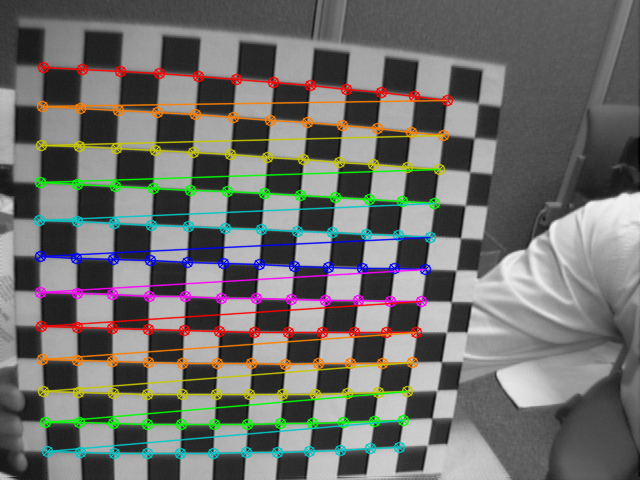

gdrive/My Drive/cameraCalibrationImages/Image13.tif


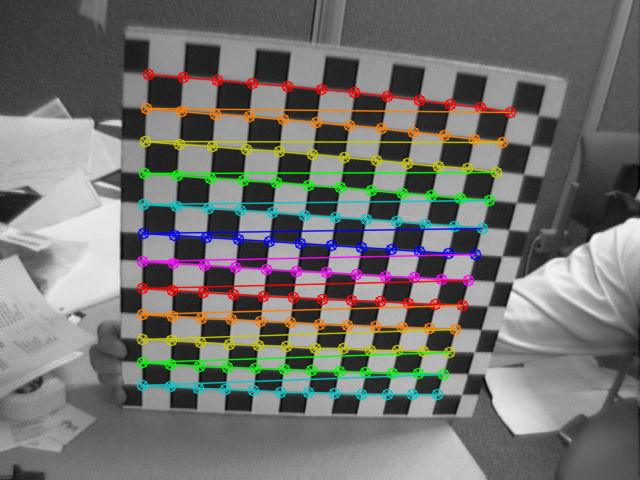

In [ ]:
import numpy as np
import cv2
import os
import glob

CHECKERBOARD = (12,12) #rows, columns

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, .001)

threeDPoints = [];
twoDPoints = []; 

objectPointThreeD = np.zeros((CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
#print(objectPointThreeD.shape);
objectPointThreeD[:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1,2)
#print(objectPointThreeD.shape)

from google.colab import drive
drive.mount('/content/gdrive')
data_dir = "gdrive/My Drive/cameraCalibrationImages/*.tif"
images = glob.glob(data_dir)

from google.colab.patches import cv2_imshow

for idx, filename in enumerate(images):
  image = cv2.imread(filename)
  grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  ret, corners = cv2.findChessboardCorners(grayColor, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + 
                                           cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

  if ret == True:
    threeDPoints.append(objectPointThreeD)

    corners2 = cv2.cornerSubPix(grayColor, corners, (5,5), (-1, -1), criteria)
    twoDPoints.append(corners2)

    print(filename)
    imageNew = cv2.drawChessboardCorners(image, CHECKERBOARD, corners, ret)

    cv2_imshow(imageNew)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
print("threeDPoints.shape")
print(len(threeDPoints))
print(len(threeDPoints[0]))
print("twoDPoints.shape")
print(len(twoDPoints))
print(len(twoDPoints[0]))

h, w = grayColor.shape[:2]
ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(threeDPoints, twoDPoints, grayColor.shape[::-1], None, None)
newCameraMatrix, roi = cv2.getOptimalNewCameraMatrix(matrix, distortion, (w,h), 1, (w,h))

print("\n r_vecs")
print(r_vecs)
print("\n t_vecs")
print(t_vecs)

#print("\n Camera matrix: ")
#print(matrix)
#print("\n Distortion coefficient: ")
#print(distortion)
#print("\n Rotation vectors: ")
#rint(r_vecs)
#print("\n Translation vectors: ")
#print(t_vecs)

for idx, filename in enumerate(images):
  image = cv2.imread(filename)
  h, w = image.shape[:2]
    
  undistort = cv2.undistort(image, matrix, distortion, newCameraMatrix)

  data_dir_out = "gdrive/My Drive/cameraCalibrationOutputImages/"

  x, y, w, h = roi
  undistortCrop = undistort[y:y+h, x:x+w]
  filenameUndistortCrop = data_dir_out + filename[40:-4] + 'UndistortCrop.tif'
  print("\n filenameUndistortCrop")
  print(filenameUndistortCrop)
  cv2.imwrite(filenameUndistortCrop, undistortCrop)
    
  imgCrop = image[y:y+h, x:x+w]
  filenameCrop = data_dir_out + filename[40:-4] + 'Crop.tif'
  print("\n filenameCrop")
  print(filenameCrop)
  cv2.imwrite(filenameCrop,imgCrop)


threeDPoints.shape
10
144
twoDPoints.shape
10
144

 r_vecs
[array([[-0.15428182],
       [ 0.84653128],
       [ 1.62469956]]), array([[-0.07742241],
       [-0.96871393],
       [ 1.42712055]]), array([[ 0.73958584],
       [-0.0907686 ],
       [ 0.11881967]]), array([[-0.53210071],
       [-0.11882434],
       [ 0.02698833]]), array([[-0.52943227],
       [-0.01421747],
       [ 0.17116341]]), array([[-0.17559046],
       [-0.01146127],
       [ 0.21128575]]), array([[ 0.37469516],
       [ 0.4015932 ],
       [-1.39781829]]), array([[ 0.42280178],
       [-0.14059624],
       [ 0.08164589]]), array([[ 0.23596797],
       [-0.21327937],
       [ 0.06471946]]), array([[ 0.44942788],
       [-0.12834168],
       [ 0.09567107]])]

 t_vecs
[array([[ 7.79675825],
       [-5.23438986],
       [21.1958822 ]]), array([[ 5.91630265],
       [-4.90370367],
       [21.05259645]]), array([[-4.9447039 ],
       [-2.67484369],
       [14.83491067]]), array([[-5.13383923],
       [-5.34416327],
  